##### 1.建構第一個網路，比較VGG16與簡易自薦模型的差異性。
##### 2. data preprocess 練習
##### 3.KAGGLE Plant Seedlings Classification:https://www.kaggle.com/c/plant-seedlings-classification/overview
##### 4. epoch=100 左右效果最佳
##### 5. 目標:繼續提高準確率到90%(當前84.5%左右)
#### 6. regularization,activation function 選擇注意

 # change path(for google Colab)

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
!mkdir -p drive

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow-gpu 

In [1]:
import tensorflow as tf
print(tf.__version__)


D:\Users\u9593\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\u9593\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\u9593\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\u9593\Anaconda3\envs\tensorflow-gpu\l

1.14.0


In [ ]:
import os
os.chdir("D:\\jupyter\\tensorflow") #change path

In [ ]:
!ls
os.getcwd()

# data prepocess

In [2]:
import os
import numpy as np
import pandas as pd
test_data_path = os.path.join(os.getcwd(),"test")
train_data_path = os.path.join(os.getcwd(),"train")
sample_submission = pd.read_csv("sample_submission.csv")
#check if csv read correct or not
sample_submission.tail(10)


,file,species
784,fda39e16f.png,Sugar beet
785,fdea6b119.png,Sugar beet
786,fe29629fb.png,Sugar beet
787,fe9e87b78.png,Sugar beet
788,fea1d13d6.png,Sugar beet
789,fea355851.png,Sugar beet
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Sugar beet
793,ffc6f8527.png,Sugar beet


In [3]:
#class def:
class_plant = [
                "Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen",
                "Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"
]
class_num = len(class_plant)

num_of_test_samples = 0

#the disbution of data:
for L in class_plant:
    print("{} have {} images".format(L, len(os.listdir(os.path.join(train_data_path,L))))) #os.listdir:取得所有檔案名稱
    num_of_test_samples = num_of_test_samples+len(os.listdir(os.path.join(train_data_path,L)))
print(num_of_test_samples)

Black-grass have 263 images
Charlock have 390 images
Cleavers have 287 images
Common Chickweed have 611 images
Common wheat have 221 images
Fat Hen have 475 images
Loose Silky-bent have 654 images
Maize have 221 images
Scentless Mayweed have 516 images
Shepherds Purse have 231 images
Small-flowered Cranesbill have 496 images
Sugar beet have 385 images
4750


In [4]:
#data arrange
train = []
for i in enumerate(class_plant):
  class_id = i[0]
  class_type = i[1]
  #start arranging into matrix:
  for file in os.listdir(os.path.join("train", class_type)):
    train.append([class_id,class_type,file])

train_df = pd.DataFrame(train, columns=["class_id","TYPE","file name"])
train_df.tail(10) #data check

,class_id,TYPE,file name
4740,11,Sugar beet,f9a842f5f.png
4741,11,Sugar beet,faaac2544.png
4742,11,Sugar beet,fb57ce659.png
4743,11,Sugar beet,fbb26c002.png
4744,11,Sugar beet,fbec8cc1a.png
4745,11,Sugar beet,fc293eacb.png
4746,11,Sugar beet,fc441208c.png
4747,11,Sugar beet,fed9406b2.png
4748,11,Sugar beet,fef5e7066.png
4749,11,Sugar beet,ffa401155.png


# restore training model (arg.)

In [4]:
from tensorflow.keras.models import load_model
model= load_model("seed_predict.h5")
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150, 150, 64)      0         
________________________________

# model construct (VGG16)

In [ ]:

import numpy as np
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend as K



def VGG16(include_top=True,input_tensor=None, input_shape=(224,224,3),
          pooling='max',classes=1000):
 
    img_input = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
  
    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    if include_top: #include_top: whether to include the 3 fully-connected layers at the top of the network.
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(1000, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')
   
    return model


model = VGG16(include_top=False)
model.summary()

# construct simple model:

In [5]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

TRAIN_DATASET_PATH = 'train'
TEST_DATASET_PATH = 'test'
IMAGE_SIZE = (150,150)
BATCH_SIZE = 16
NUM_CLASSES = 12 # number of category


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=85, # image rotation angle range
                                   width_shift_range=0.2, # horiziontal shift
                                   height_shift_range=0.2, # vertical shift
                                   shear_range=0.2, # transform rectangle to parallelogram
                                   zoom_range=0.2, # the scale of zoom in or zoom out
                                   channel_shift_range=0, # change whole image color by shift color channel
                                   horizontal_flip=True,
                                   fill_mode='nearest', # the method to transform the image (eg. zoom, shift...)
                                   validation_split=0.2) # 80% for training  20% for validation

# generate train data & validation data
train_batches = train_datagen.flow_from_directory(TRAIN_DATASET_PATH,
                                                  target_size=IMAGE_SIZE, # image scale size
                                                  interpolation='bicubic', # image scale method
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset='training')
valid_batches = train_datagen.flow_from_directory(TRAIN_DATASET_PATH,
                                                  target_size=IMAGE_SIZE, # image scale size
                                                  interpolation='bicubic', # image scale method
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset='validation')
#remember not to expand test set

for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Class #0 = Black-grass
Class #1 = Charlock
Class #2 = Cleavers
Class #3 = Common Chickweed
Class #4 = Common wheat
Class #5 = Fat Hen
Class #6 = Loose Silky-bent
Class #7 = Maize
Class #8 = Scentless Mayweed
Class #9 = Shepherds Purse
Class #10 = Small-flowered Cranesbill
Class #11 = Sugar beet


In [7]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='linear',input_shape=(150,150,3)))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(64,(3,3),padding='same',activation='linear'))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(64,(3,3),padding='same',activation='linear'))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),padding='same',strides=2,activation='linear'))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(128,(3,3),padding='same',activation='linear'))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(128,(3,3),padding='same',activation='linear'))
model.add(layers.LeakyReLU())

model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation='tanh'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 150, 150, 64)      0         
____

In [8]:
from tensorflow.keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [8]:
start_train=model.fit(train_batches,
                      epochs=100,
                      verbose=1,
                      validation_data=valid_batches)
model.save('seed_predict.h5')

Epoch 1/100
238/238 [==============================] - 96s 405ms/step - loss: 2.0737 - acc: 0.2653 - val_loss: 1.6442 - val_acc: 0.4139
Epoch 2/100
238/238 [==============================] - 94s 394ms/step - loss: 1.5836 - acc: 0.4407 - val_loss: 1.4867 - val_acc: 0.4931
Epoch 3/100
238/238 [==============================] - 94s 395ms/step - loss: 1.4451 - acc: 0.4912 - val_loss: 1.4482 - val_acc: 0.5132
Epoch 4/100
238/238 [==============================] - 82s 344ms/step - loss: 1.3407 - acc: 0.5338 - val_loss: 1.3247 - val_acc: 0.5713
Epoch 5/100
238/238 [==============================] - 75s 315ms/step - loss: 1.2613 - acc: 0.5619 - val_loss: 1.2600 - val_acc: 0.5766
Epoch 6/100
238/238 [==============================] - 76s 320ms/step - loss: 1.1652 - acc: 0.5924 - val_loss: 1.1253 - val_acc: 0.6230
Epoch 7/100
238/238 [==============================] - 69s 291ms/step - loss: 1.0828 - acc: 0.6171 - val_loss: 1.1095 - val_acc: 0.6431
Epoch 8/100
238/238 [===========================

Epoch 61/100
238/238 [==============================] - 90s 378ms/step - loss: 0.4614 - acc: 0.8367 - val_loss: 0.6159 - val_acc: 0.8025
Epoch 62/100
238/238 [==============================] - 91s 381ms/step - loss: 0.4585 - acc: 0.8441 - val_loss: 0.4569 - val_acc: 0.8522
Epoch 63/100
238/238 [==============================] - 91s 384ms/step - loss: 0.4478 - acc: 0.8407 - val_loss: 0.5504 - val_acc: 0.8046
Epoch 64/100
238/238 [==============================] - 91s 382ms/step - loss: 0.4400 - acc: 0.8462 - val_loss: 0.4650 - val_acc: 0.8479
Epoch 65/100
238/238 [==============================] - 91s 383ms/step - loss: 0.4311 - acc: 0.8504 - val_loss: 0.4608 - val_acc: 0.8553
Epoch 66/100
238/238 [==============================] - 90s 377ms/step - loss: 0.4293 - acc: 0.8478 - val_loss: 0.4611 - val_acc: 0.8490
Epoch 67/100
238/238 [==============================] - 90s 379ms/step - loss: 0.4407 - acc: 0.8459 - val_loss: 0.5092 - val_acc: 0.8215
Epoch 68/100
238/238 [===================

<function matplotlib.pyplot.show(*args, **kw)>

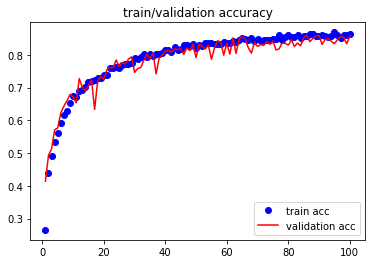

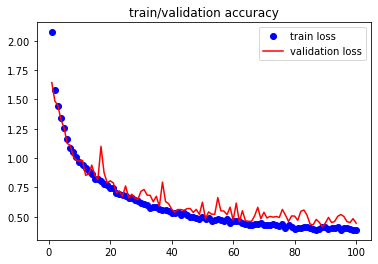

In [9]:
import matplotlib.pyplot as plt

acc=start_train.history['acc']
val_acc=start_train.history['val_acc']
loss=start_train.history['loss']
val_loss=start_train.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train acc")
plt.plot(epochs,val_acc,'r',label="validation acc")
plt.title("train/validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'r',label="validation loss")
plt.title("train/validation accuracy")
plt.legend()

plt.show

# Confusion Matrix
##### 注意此方式建立稀疏矩陣有其缺陷，資料集不可經過shuffle。
##### 藉由建立新的dataGenerator去重建一個未被影響的集合。(只做rescale動作)

In [6]:
abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']
pd.DataFrame({'class': class_plant, 'abbreviation': abbreviation})

,class,abbreviation
0,Black-grass,BG
1,Charlock,Ch
2,Cleavers,Cl
3,Common Chickweed,CC
4,Common wheat,CW
5,Fat Hen,FH
6,Loose Silky-bent,LSB
7,Maize,M
8,Scentless Mayweed,SM
9,Shepherds Purse,SP


In [11]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow_from_directory(TRAIN_DATASET_PATH,
                                                        target_size=IMAGE_SIZE,
                                                        shuffle=None,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical')

Found 4750 images belonging to 12 classes.


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

model= load_model("seed_predict.h5")
Y_pred = model.predict_generator(validation_generator, 4750 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=-1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[172   1   0   3  20   8  50   1   1   0   1   6]
 [  0 377   2   0   0   0   0   2   1   2   1   5]
 [  0 111 165   1   3   1   0   0   1   1   1   3]
 [  1   2   0 572   0   0   0   1  10  20   2   3]
 [  3   0   3   3 200   8   0   1   1   0   0   2]
 [  0  18   0   3   1 438   1   1   0   0   8   5]
 [105   0   0   5   8   3 512   0  12   0   4   5]
 [  0   0   0   0   0   4   0 209   2   0   0   6]
 [  2  15   0   4   0   0   2   0 461  27   0   5]
 [  0   9   1   7   0   0   0   0  47 163   3   1]
 [  0  11   1   0   1   2   1   1   1   1 475   2]
 [  1   7   2   2   0   2   0   1   2   2   0 366]]
Classification Report
              precision    recall  f1-score   support

          BG       0.61      0.65      0.63       263
          Ch       0.68      0.97      0.80       390
          Cl       0.95      0.57      0.72       287
          CC       0.95      0.94      0.94       611
          CW       0.86      0.90      0.88       221
          FH       0.94

# test the model!

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import glob
import cv2

img_names = glob.glob('test' + '\\' + '*.png') # get all image file name
model = load_model("seed_predict.h5")
# load test data
img = []
for i in range(len(img_names)):
    images = image.load_img(img_names[i], target_size=IMAGE_SIZE)
    images = image.img_to_array(images)
    images = images/255.
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #if i==20:
        #print(images)
        #cv2.imshow(img_names[i],images) #make sure input data is correct
        #print("origin")
    images = np.expand_dims(images, axis=0) # 2D array => 1D array
    img.append(images)
        
x = np.concatenate([images for images in img]) # convert list to numpy array
print(np.shape(x))
# predict test data
pred = model.predict(x,verbose=1)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(794, 150, 150, 3)
794/794 [==============================] - 4s 5ms/sample


In [11]:
import csv

file_names = [name.split('\\')[1] for name in img_names] # get all image file name
# generate class id and class name map table
# eg. #0 => Black-grass
class_map = {idx:cls for cls, idx in list(train_batches.class_indices.items())} 

pred_idx = np.argmax(pred,axis=-1 ) # get the highest probability class
print(pred_idx)

pred_result = [class_map[idx] for idx in pred_idx] # convert class id to class name

# convert predict result to csv file
with open('submission3.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['file', 'species']) # write csv file header
    for i in range(len(pred_result)):
        writer.writerow([file_names[i], pred_result[i]])

[10  5 11  3 11  6  3  5  0  0  5 10 11  8 11  5  8  8  3  1  3 10  9 11
 11  7  9  9  3 11  3  9  0  1  6  0  3  6  3  7  3  4  3 10 11  5  7  8
  7 10  6 11  2  6  7  5  1 10  2  6 11  2  1  4  7  5  6  6  1  8 10  3
  8  3  3  4  6  8  8  6 11  3  3  4  9 11  2  8  5  5  1  6  5  6  3  6
 10  8  7  1  5  5  8 11  5  5  3  9  1  1  6  1  3  9  9 11  2  1 11 11
  3  1  2  6  7  4  1  7  5  3 11 11  3  3  5  4  5  1  6  3  6 10  9  3
  5 11  4 10 11  1  8  6  7  8  6 10  3  5  6  1  1  6  8  8  9  0  9  4
  3  3  9  7  9  3  3 10  0  2  6  6  6 10  6 11  8  4  3  5  5 10  6  1
  8  4  1  6  4  3  6  3  2  6  1  1 10  1  5  3  5  9  5  1  5  0 10  2
  7  6 10  3  8  8  3 10  4  5  5  3  3  7  9  1  1  2  3  0  0  2 10  1
 11  3  7 10  1  9  6  5 10  5  3  6  7  3  3  4  2  1 10  3  0  7  3  7
 10  1  5  9  8  9  1  6  6 10  3 10  8  3  5  2  0  6  7 11  7  6  3  3
  7  3  6  8  1  7 10 11  6  6 10  5  9  3  2 10 11  1  1  8  2  2 11  6
  8  4  9  6 11  1  6 10 11  1  1 10 10 10  0 11 10

# reference model

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D

#model = Sequential()
sequence_input = Input(name='sequence_input', shape=(224, 224, 3))
x = Conv2D(32, 2, input_shape=(224, 224, 3), padding='same', activation='relu')(sequence_input)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, 2, padding='same', activation='relu')(sequence_input)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(sequence_input, pred)
opt = optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# summarize the model
print(model.summary())
model.fit(train_batches,
          epochs=5,
          verbose=1,
          validation_data=valid_batches)